# Prelude

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\oglan/text-fabric-data/annotation/app-bhsa/code:
	rv1.1=#35e4fee27a1cd6f0a5caea9118129349ddb0604e (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Jer 1 queries

## The word happening

### Task #1: 

Try to investiage the formulation "The word happening" and do a statistical analysis of its appearance. How could you best understand the construction? Do a statistical survey by exporting your results and loading them back as a pandas dataframe (see the first TF notebook of this class to get instructions). Create some charts that help you get a better graphical representations of the phenomenons distribution.

In [4]:
WordHappens1='''
clause typ=WayX
    phrase function=Pred
        word lex=HJH[
    phrase function=Subj
        word lex=DBR/ st=c
        <: word lex*
'''
WordHappens1  = A.search(WordHappens1)
A.table(WordHappens1, start=1, end=2, condensed=True)

  2.61s 87 results


n,p,verse,clause,word,word,phrase,phrase,word
1,1_Samuel 4:1,וַיְהִ֥י דְבַר־שְׁמוּאֵ֖ל לְכָל־יִשְׂרָאֵ֑ל וַיֵּצֵ֣א יִשְׂרָאֵל֩ לִקְרַ֨את פְּלִשְׁתִּ֜ים לַמִּלְחָמָ֗ה וַֽיַּחֲנוּ֙ עַל־הָאֶ֣בֶן הָעֵ֔זֶר וּפְלִשְׁתִּ֖ים חָנ֥וּ בַאֲפֵֽק׃,וַיְהִ֥י דְבַר־שְׁמוּאֵ֖ל לְכָל־יִשְׂרָאֵ֑ל,יְהִ֥י,דְבַר־,יְהִ֥י,דְבַר־שְׁמוּאֵ֖ל,שְׁמוּאֵ֖ל
2,1_Samuel 15:10,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁמוּאֵ֖ל לֵאמֹֽר׃,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁמוּאֵ֖ל,יְהִי֙,יְהִי֙,דְּבַר־יְהוָ֔ה,דְּבַר־,יְהוָ֔ה


In [5]:
A.export(WordHappens1, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='WordHappens1.tsv')

In [6]:
WordHappens1=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/WordHappens1.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
WordHappens1.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,typ1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,st5,NODE6,TYPE6,TEXT6,lex6
0,1,1_Samuel,4,1,454341,clause,וַיְהִ֥י דְבַר־שְׁמוּאֵ֖ל לְכָל־יִשְׂרָאֵ֑ל,WayX,732780,phrase,יְהִ֥י,Pred,143274,word,יְהִ֥י,HJH[,732781,phrase,דְבַר־שְׁמוּאֵ֖ל,Subj,143275,word,דְבַר־,DBR/,c,143276,word,שְׁמוּאֵ֖ל,CMW>L/
1,2,1_Samuel,15,10,455662,clause,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁמוּאֵ֖ל,WayX,736820,phrase,יְהִי֙,Pred,149747,word,יְהִי֙,HJH[,736821,phrase,דְּבַר־יְהוָ֔ה,Subj,149748,word,דְּבַר־,DBR/,c,149749,word,יְהוָ֔ה,JHWH/
2,3,2_Samuel,7,4,458635,clause,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־נָתָ֖ן,WayX,745898,phrase,יְהִי֙,Pred,164017,word,יְהִי֙,HJH[,745899,phrase,דְּבַר־יְהוָ֔ה,Subj,164018,word,דְּבַר־,DBR/,c,164019,word,יְהוָ֔ה,JHWH/
3,4,1_Kings,6,11,461947,clause,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁלֹמֹ֖ה,WayX,755786,phrase,יְהִי֙,Pred,180305,word,יְהִי֙,HJH[,755787,phrase,דְּבַר־יְהוָ֔ה,Subj,180306,word,דְּבַר־,DBR/,c,180307,word,יְהוָ֔ה,JHWH/
4,5,1_Kings,12,22,462954,clause,וַיְהִי֙ דְּבַ֣ר הָֽאֱלֹהִ֔ים אֶל־שְׁמַעְיָ֥ה ...,WayX,758913,phrase,יְהִי֙,Pred,186479,word,יְהִי֙,HJH[,758914,phrase,דְּבַ֣ר הָֽאֱלֹהִ֔ים,Subj,186480,word,דְּבַ֣ר,DBR/,c,186481,word,הָֽ,H


In [7]:
WordHappens1["lex6"].value_counts()

JHWH/     84
>LHJM/     1
CMW>L/     1
H          1
Name: lex6, dtype: int64

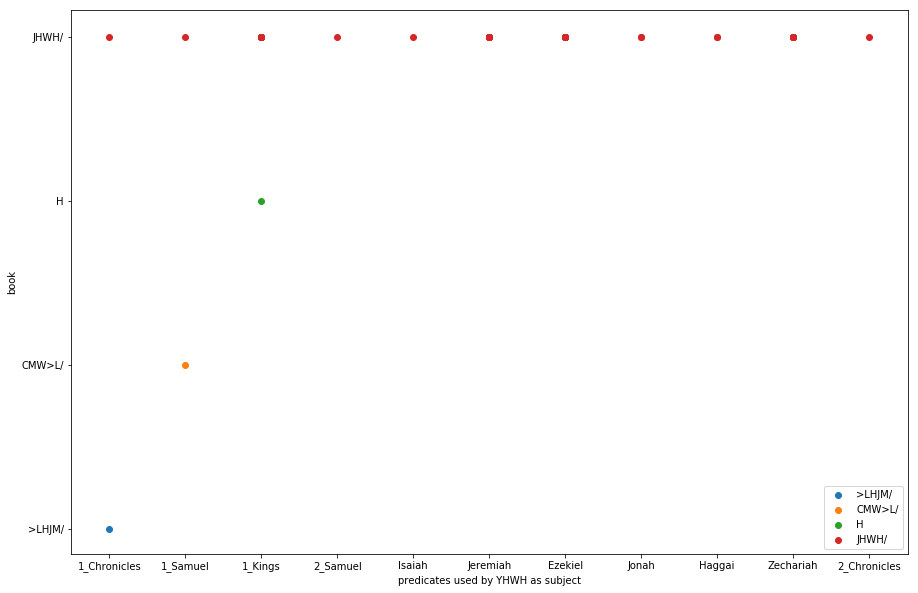

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

for S1, df in WordHappens1.groupby('lex6'):
    ax.scatter(x="S1", y="lex6", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

Text(0.5,20.8,'OT books')

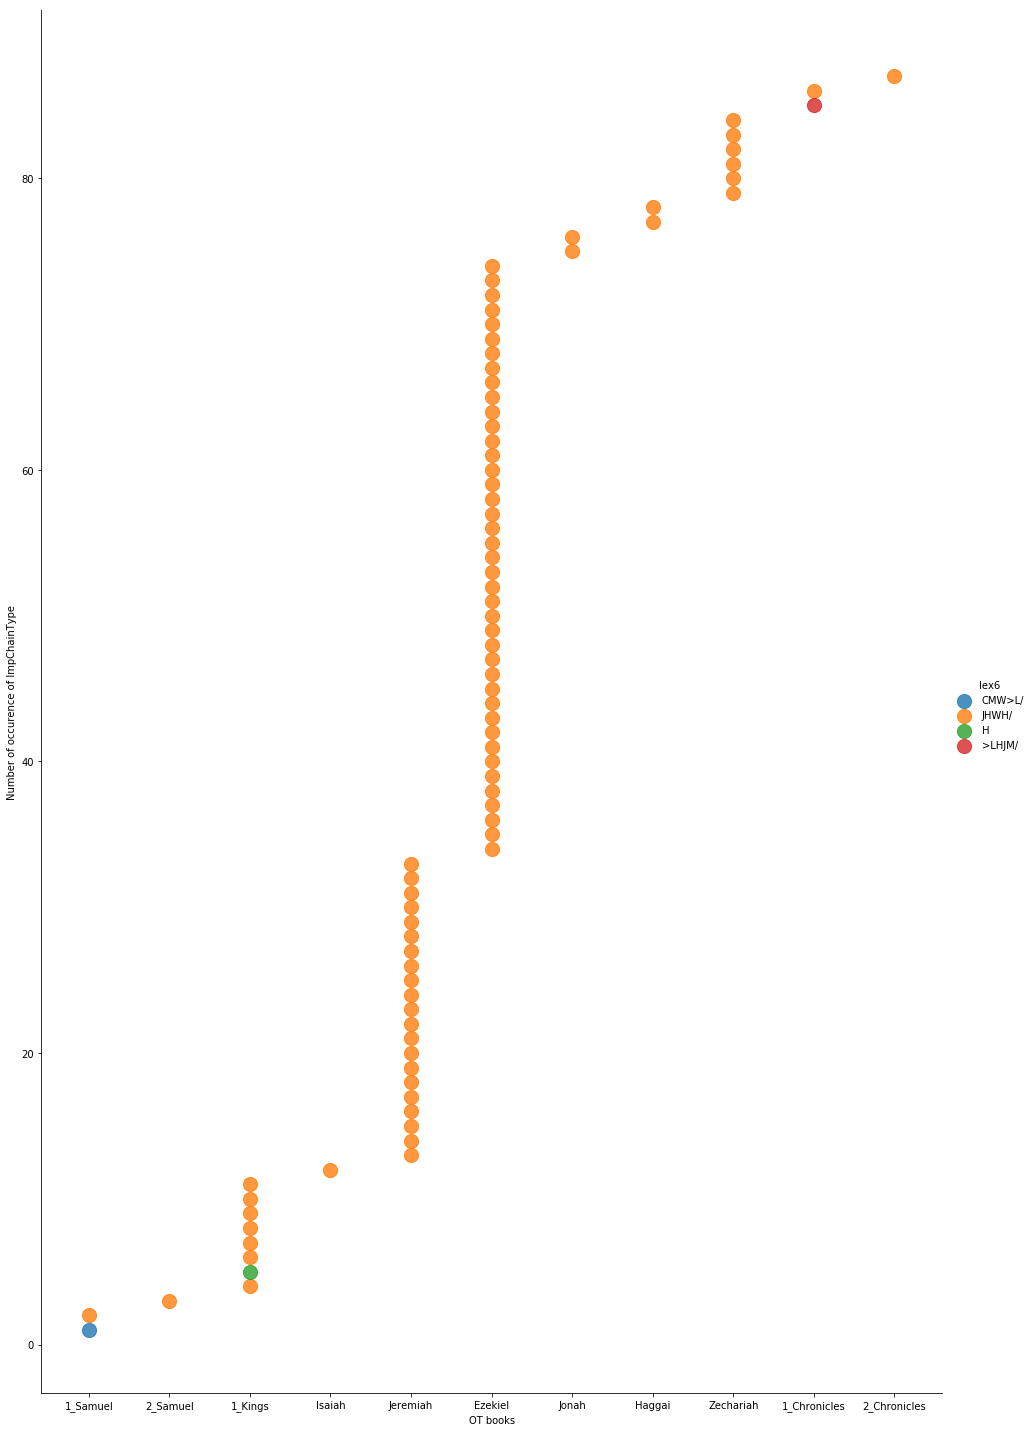

In [9]:
sns.lmplot(x="S1", y="R", data=WordHappens1, hue='lex6', height=20, aspect=2/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

In [10]:
WordHappens2='''
clause typ=WayX
    phrase function=Pred
        word lex=HJH[
    phrase function=Subj
        word lex=DBR/ st=c
        <: word sp#nmpr
'''
WordHappens2  = A.search(WordHappens2)
A.table(WordHappens2, start=1, end=2, condensed=True)

  2.21s 2 results


n,p,verse,phrase,phrase,clause,word,word,word
1,1_Kings 12:22,וַיְהִי֙ דְּבַ֣ר הָֽאֱלֹהִ֔ים אֶל־שְׁמַעְיָ֥ה אִישׁ־הָאֱלֹהִ֖ים לֵאמֹֽר׃,יְהִי֙,דְּבַ֣ר הָֽאֱלֹהִ֔ים,וַיְהִי֙ דְּבַ֣ר הָֽאֱלֹהִ֔ים אֶל־שְׁמַעְיָ֥ה אִישׁ־הָאֱלֹהִ֖ים,יְהִי֙,דְּבַ֣ר,הָֽ
2,1_Chronicles 17:3,וַֽיְהִ֖י בַּלַּ֣יְלָה הַה֑וּא וַיְהִי֙ דְּבַר־אֱלֹהִ֔ים אֶל־נָתָ֖ן לֵאמֹֽר׃,יְהִי֙,דְּבַר־אֱלֹהִ֔ים,יְהִי֙,דְּבַר־,אֱלֹהִ֔ים,וַיְהִי֙ דְּבַר־אֱלֹהִ֔ים אֶל־נָתָ֖ן


In [11]:
WordHappens3='''
clause typ=WayX
    phrase function=Pred
        word lex=HJH[ nu=sg
    phrase function=Subj
        :: word lex#DBR/ sp#nmpr lex#>LHJM/
'''
WordHappens3  = A.search(WordHappens3)
A.table(WordHappens3, start=1, end=20, condensed=True)

  2.34s 72 results


In [12]:
WordHappens4='''
clause typ=WayX
    phrase function=Pred
        word lex=HJH[ nu=sg
    phrase function=Subj
        word lex=DBR/ nu=sg st=c
        <: word sp=nmpr
'''
WordHappens4  = A.search(WordHappens4)
A.table(WordHappens4, start=1, end=20, condensed=True)

  2.72s 85 results


n,p,verse,clause,word,word,phrase,phrase,word
1,1_Samuel 4:1,וַיְהִ֥י דְבַר־שְׁמוּאֵ֖ל לְכָל־יִשְׂרָאֵ֑ל וַיֵּצֵ֣א יִשְׂרָאֵל֩ לִקְרַ֨את פְּלִשְׁתִּ֜ים לַמִּלְחָמָ֗ה וַֽיַּחֲנוּ֙ עַל־הָאֶ֣בֶן הָעֵ֔זֶר וּפְלִשְׁתִּ֖ים חָנ֥וּ בַאֲפֵֽק׃,וַיְהִ֥י דְבַר־שְׁמוּאֵ֖ל לְכָל־יִשְׂרָאֵ֑ל,יְהִ֥י,דְבַר־,יְהִ֥י,דְבַר־שְׁמוּאֵ֖ל,שְׁמוּאֵ֖ל
2,1_Samuel 15:10,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁמוּאֵ֖ל לֵאמֹֽר׃,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁמוּאֵ֖ל,יְהִי֙,יְהִי֙,דְּבַר־יְהוָ֔ה,דְּבַר־,יְהוָ֔ה
3,2_Samuel 7:4,וַיְהִ֖י בַּלַּ֣יְלָה הַה֑וּא וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־נָתָ֖ן לֵאמֹֽר׃,יְהִי֙,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־נָתָ֖ן,דְּבַר־יְהוָ֔ה,יְהִי֙,דְּבַר־,יְהוָ֔ה
4,1_Kings 6:11,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁלֹמֹ֖ה לֵאמֹֽר׃,יְהִי֙,דְּבַר־יְהוָ֔ה,יְהִי֙,דְּבַר־,יְהוָ֔ה,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־שְׁלֹמֹ֖ה
5,1_Kings 13:20,וַיְהִ֕י הֵ֥ם יֹשְׁבִ֖ים אֶל־הַשֻּׁלְחָ֑ן פ וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־הַנָּבִ֖יא אֲשֶׁ֥ר הֱשִׁיבֹֽו׃,דְּבַר־,יְהוָ֔ה,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־הַנָּבִ֖יא,יְהִי֙,דְּבַר־יְהוָ֔ה,יְהִי֙
6,1_Kings 16:1,וַיְהִ֤י דְבַר־יְהוָה֙ אֶל־יֵה֣וּא בֶן־חֲנָ֔נִי עַל־בַּעְשָׁ֖א לֵאמֹֽר׃,יְהִ֤י,דְבַר־,יְהוָה֙,יְהִ֤י,דְבַר־יְהוָה֙,וַיְהִ֤י דְבַר־יְהוָה֙ אֶל־יֵה֣וּא בֶן־חֲנָ֔נִי עַל־בַּעְשָׁ֖א
7,1_Kings 17:2,וַיְהִ֥י דְבַר־יְהוָ֖ה אֵלָ֥יו לֵאמֹֽר׃,וַיְהִ֥י דְבַר־יְהוָ֖ה אֵלָ֥יו,יְהִ֥י,דְבַר־יְהוָ֖ה,יְהִ֥י,דְבַר־,יְהוָ֖ה
8,1_Kings 17:8,וַיְהִ֥י דְבַר־יְהוָ֖ה אֵלָ֥יו לֵאמֹֽר׃,יְהִ֥י,דְבַר־יְהוָ֖ה,יְהוָ֖ה,יְהִ֥י,דְבַר־,וַיְהִ֥י דְבַר־יְהוָ֖ה אֵלָ֥יו
9,1_Kings 21:17,וַיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־אֵלִיָּ֥הוּ הַתִּשְׁבִּ֖י לֵאמֹֽר׃,דְּבַר־יְהוָ֔ה,יְהִי֙,דְּבַר־,יְהוָ֔ה,וַיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־אֵלִיָּ֥הוּ הַתִּשְׁבִּ֖י,יְהִי֙
10,1_Kings 21:28,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־אֵלִיָּ֥הוּ הַתִּשְׁבִּ֖י לֵאמֹֽר׃,וַֽיְהִי֙ דְּבַר־יְהוָ֔ה אֶל־אֵלִיָּ֥הוּ הַתִּשְׁבִּ֖י,יְהִי֙,דְּבַר־,יְהוָ֔ה,יְהִי֙,דְּבַר־יְהוָ֔ה


## Prophet
### Task 2: 

Search in Bible Software (Logos/Accordance) how often NBJ> appears in the Bible. What insights could you generate from your findings?

In [13]:
NBJ='''
word lex=NBJ>/
'''
NBJ  = A.search(NBJ)
A.table(NBJ, start=1, end=2, condensed=True)

  0.53s 319 results


n,p,verse,word
1,Genesis 20:7,וְעַתָּ֗ה הָשֵׁ֤ב אֵֽשֶׁת־הָאִישׁ֙ כִּֽי־נָבִ֣יא ה֔וּא וְיִתְפַּלֵּ֥ל בַּֽעַדְךָ֖ וֶֽחְיֵ֑ה וְאִם־אֵֽינְךָ֣ מֵשִׁ֗יב דַּ֚ע כִּי־מֹ֣ות תָּמ֔וּת אַתָּ֖ה וְכָל־אֲשֶׁר־לָֽךְ׃,נָבִ֣יא
2,Exodus 7:1,וַיֹּ֤אמֶר יְהוָה֙ אֶל־מֹשֶׁ֔ה רְאֵ֛ה נְתַתִּ֥יךָ אֱלֹהִ֖ים לְפַרְעֹ֑ה וְאַהֲרֹ֥ן אָחִ֖יךָ יִהְיֶ֥ה נְבִיאֶֽךָ׃,נְבִיאֶֽךָ׃


In [14]:
A.export(NBJ, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='NBJ.tsv')

In [15]:
NBJ=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/NBJ.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
NBJ.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,20,7,9379,word,נָבִ֣יא,NBJ>/
1,2,Exodus,7,1,31798,word,נְבִיאֶֽךָ׃,NBJ>/
2,3,Numbers,11,29,77450,word,נְבִיאִ֔ים,NBJ>/
3,4,Numbers,12,6,77685,word,נְבִ֣יאֲכֶ֔ם,NBJ>/
4,5,Deuteronomy,13,2,101040,word,נָבִ֔יא,NBJ>/


In [16]:
NBJ["S1"].value_counts()

Jeremiah        95
1_Kings         50
2_Kings         33
2_Chronicles    26
Ezekiel         17
1_Samuel        12
Zechariah       12
Deuteronomy     10
Hosea            8
Isaiah           7
Amos             5
Nehemiah         5
Ezra             5
Haggai           5
Daniel           4
Lamentations     4
2_Samuel         3
Micah            3
1_Chronicles     3
Psalms           3
Numbers          2
Habakkuk         2
Zephaniah        1
Exodus           1
Judges           1
Malachi          1
Genesis          1
Name: S1, dtype: int64

## I am with you
### Task 3: 

Study the construction "I am with you" and create searches that help you to find these and other similar constructions  of that nature. What links (if any) do you think are estabslihed by Jer's word usage?

In [17]:
withYou1='''
clause typ=NmCl
    phrase function=PreC
        word lex=>T==|<M
    phrase function=Subj
        word lex=>NKJ|>NJ
    
'''
withYou1  = A.search(withYou1)
A.table(withYou1, start=1, end=20, condensed=True)

  2.07s 18 results


n,p,verse,phrase,word,clause,word,phrase
1,Genesis 26:24,וַיֵּרָ֨א אֵלָ֤יו יְהוָה֙ בַּלַּ֣יְלָה הַה֔וּא וַיֹּ֕אמֶר אָנֹכִ֕י אֱלֹהֵ֖י אַבְרָהָ֣ם אָבִ֑יךָ אַל־תִּירָא֙ כִּֽי־אִתְּךָ֣ אָנֹ֔כִי וּבֵֽרַכְתִּ֨יךָ֙ וְהִרְבֵּיתִ֣י אֶֽת־זַרְעֲךָ֔ בַּעֲב֖וּר אַבְרָהָ֥ם עַבְדִּֽי׃,אָנֹ֔כִי,אִתְּךָ֣,כִּֽי־אִתְּךָ֣ אָנֹ֔כִי,אָנֹ֔כִי,אִתְּךָ֣
2,Genesis 28:15,וְהִנֵּ֨ה אָנֹכִ֜י עִמָּ֗ךְ וּשְׁמַרְתִּ֨יךָ֙ בְּכֹ֣ל אֲשֶׁר־תֵּלֵ֔ךְ וַהֲשִׁ֣בֹתִ֔יךָ אֶל־הָאֲדָמָ֖ה הַזֹּ֑את כִּ֚י לֹ֣א אֶֽעֱזָבְךָ֔ עַ֚ד אֲשֶׁ֣ר אִם־עָשִׂ֔יתִי אֵ֥ת אֲשֶׁר־דִּבַּ֖רְתִּי לָֽךְ׃,וְהִנֵּ֨ה אָנֹכִ֜י עִמָּ֗ךְ,אָנֹכִ֜י,עִמָּ֗ךְ,אָנֹכִ֜י,עִמָּ֗ךְ
3,Genesis 31:38,זֶה֩ עֶשְׂרִ֨ים שָׁנָ֤ה אָנֹכִי֙ עִמָּ֔ךְ רְחֵלֶ֥יךָ וְעִזֶּ֖יךָ לֹ֣א שִׁכֵּ֑לוּ וְאֵילֵ֥י צֹאנְךָ֖ לֹ֥א אָכָֽלְתִּי׃,זֶה֩ עֶשְׂרִ֨ים שָׁנָ֤ה אָנֹכִי֙ עִמָּ֔ךְ,אָנֹכִי֙,עִמָּ֔ךְ,אָנֹכִי֙,עִמָּ֔ךְ
4,Isaiah 41:10,אַל־תִּירָא֙ כִּ֣י עִמְּךָ־אָ֔נִי אַל־תִּשְׁתָּ֖ע כִּֽי־אֲנִ֣י אֱלֹהֶ֑יךָ אִמַּצְתִּ֨יךָ֙ אַף־עֲזַרְתִּ֔יךָ אַף־תְּמַכְתִּ֖יךָ בִּימִ֥ין צִדְקִֽי׃,כִּ֣י עִמְּךָ־אָ֔נִי,עִמְּךָ־,אָ֔נִי,עִמְּךָ־,אָ֔נִי
5,Isaiah 43:2,כִּֽי־תַעֲבֹ֤ר בַּמַּ֨יִם֙ אִתְּךָ־אָ֔נִי וּבַנְּהָרֹ֖ות לֹ֣א יִשְׁטְפ֑וּךָ כִּֽי־תֵלֵ֤ךְ בְּמֹו־אֵשׁ֙ לֹ֣א תִכָּוֶ֔ה וְלֶהָבָ֖ה לֹ֥א תִבְעַר־בָּֽךְ׃,אִתְּךָ־,אָ֔נִי,אָ֔נִי,אִתְּךָ־,אִתְּךָ־אָ֔נִי
6,Isaiah 43:5,אַל־תִּירָ֖א כִּ֣י אִתְּךָ־אָ֑נִי מִמִּזְרָח֙ אָבִ֣יא זַרְעֶ֔ךָ וּמִֽמַּעֲרָ֖ב אֲקַבְּצֶֽךָּ׃,אִתְּךָ־,אָ֑נִי,כִּ֣י אִתְּךָ־אָ֑נִי,אִתְּךָ־,אָ֑נִי
7,Jeremiah 1:8,אַל־תִּירָ֖א מִפְּנֵיהֶ֑ם כִּֽי־אִתְּךָ֥ אֲנִ֛י לְהַצִּלֶ֖ךָ נְאֻם־יְהוָֽה׃,כִּֽי־אִתְּךָ֥ אֲנִ֛י,אִתְּךָ֥,אֲנִ֛י,אִתְּךָ֥,אֲנִ֛י
8,Jeremiah 1:19,וְנִלְחֲמ֥וּ אֵלֶ֖יךָ וְלֹא־י֣וּכְלוּ לָ֑ךְ כִּֽי־אִתְּךָ֥ אֲנִ֛י נְאֻם־יְהוָ֖ה לְהַצִּילֶֽךָ׃ פ,אִתְּךָ֥,אֲנִ֛י,כִּֽי־אִתְּךָ֥ אֲנִ֛י,אִתְּךָ֥,אֲנִ֛י
9,Jeremiah 15:20,וּנְתַתִּ֜יךָ לָעָ֣ם הַזֶּ֗ה לְחֹומַ֤ת נְחֹ֨שֶׁת֙ בְּצוּרָ֔ה וְנִלְחֲמ֥וּ אֵלֶ֖יךָ וְלֹא־י֣וּכְלוּ לָ֑ךְ כִּֽי־אִתְּךָ֥ אֲנִ֛י לְהֹושִֽׁיעֲךָ֥ וּלְהַצִּילֶ֖ךָ נְאֻם־יְהוָֽה׃,אִתְּךָ֥,אֲנִ֛י,אִתְּךָ֥,אֲנִ֛י,כִּֽי־אִתְּךָ֥ אֲנִ֛י
10,Jeremiah 30:11,כִּֽי־אִתְּךָ֥ אֲנִ֛י נְאֻם־יְהוָ֖ה לְהֹֽושִׁיעֶ֑ךָ כִּי֩ אֶעֱשֶׂ֨ה כָלָ֜ה בְּכָֽל־הַגֹּויִ֣ם׀ אֲשֶׁ֧ר הֲפִצֹותִ֣יךָ שָּׁ֗ם אַ֤ךְ אֹֽתְךָ֙ לֹֽא־אֶעֱשֶׂ֣ה כָלָ֔ה וְיִסַּרְתִּ֨יךָ֙ לַמִּשְׁפָּ֔ט וְנַקֵּ֖ה לֹ֥א אֲנַקֶּֽךָּ׃ פ,אִתְּךָ֥,אֲנִ֛י,כִּֽי־אִתְּךָ֥ אֲנִ֛י,אִתְּךָ֥,אֲנִ֛י


In [18]:
withYou2='''
chapter
    clause typ=NmCl
        phrase function=PreC
            word lex=>T==|<M
        phrase function=Subj
            word lex=>NKJ|>NJ
    word lex=JR>[
'''
withYou2  = A.search(withYou2)
A.table(withYou2, start=1, end=20, condensed=True)

  2.60s 24 results


## Object of JYR[
### Task 4:

Try to understand what the meaning of JYR is by searching for its typical objects (Objc, PreO).

In [23]:
JYR1='''
clause
    phrase function=PreO
        word lex=JYR[
'''
JYR1  = A.search(JYR1)
A.table(JYR1, start=1, end=20, condensed=True)

  0.53s 8 results


n,p,verse,phrase,clause,word
1,2_Kings 19:25,הֲלֹֽא־שָׁמַ֤עְתָּ לְמֵֽרָחֹוק֙ אֹתָ֣הּ עָשִׂ֔יתִי לְמִ֥ימֵי קֶ֖דֶם וִֽיצַרְתִּ֑יהָ עַתָּ֣ה הֲבֵיאתִ֗יהָ וּתְהִ֗י לַהְשֹׁ֛ות גַּלִּ֥ים נִצִּ֖ים עָרִ֥ים בְּצֻרֹֽות׃,יצַרְתִּ֑יהָ,וִֽיצַרְתִּ֑יהָ,יצַרְתִּ֑יהָ
2,Isaiah 37:26,הֲלֹֽוא־שָׁמַ֤עְתָּ לְמֵֽרָחֹוק֙ אֹותָ֣הּ עָשִׂ֔יתִי מִ֥ימֵי קֶ֖דֶם וִיצַרְתִּ֑יהָ עַתָּ֣ה הֲבֵאתִ֔יהָ וּתְהִ֗י לְהַשְׁאֹ֛ות גַּלִּ֥ים נִצִּ֖ים עָרִ֥ים בְּצֻרֹֽות׃,יצַרְתִּ֑יהָ,וִיצַרְתִּ֑יהָ,יצַרְתִּ֑יהָ
3,Isaiah 43:7,כֹּ֚ל הַנִּקְרָ֣א בִשְׁמִ֔י וְלִכְבֹודִ֖י בְּרָאתִ֑יו יְצַרְתִּ֖יו אַף־עֲשִׂיתִֽיו׃,יְצַרְתִּ֖יו,יְצַרְתִּ֖יו,יְצַרְתִּ֖יו
4,Isaiah 44:12,חָרַ֤שׁ בַּרְזֶל֙ מַֽעֲצָ֔ד וּפָעַל֙ בַּפֶּחָ֔ם וּבַמַּקָּבֹ֖ות יִצְּרֵ֑הוּ וַיִּפְעָלֵ֨הוּ֙ בִּזְרֹ֣ועַ כֹּחֹ֔ו גַּם־רָעֵב֙ וְאֵ֣ין כֹּ֔חַ לֹא־שָׁ֥תָה מַ֖יִם וַיִּיעָֽף׃,יִצְּרֵ֑הוּ,יִצְּרֵ֑הוּ,וּבַמַּקָּבֹ֖ות יִצְּרֵ֑הוּ
5,Isaiah 44:21,זְכָר־אֵ֣לֶּה יַעֲקֹ֔ב וְיִשְׂרָאֵ֖ל כִּ֣י עַבְדִּי־אָ֑תָּה יְצַרְתִּ֤יךָ עֶֽבֶד־לִי֙ אַ֔תָּה יִשְׂרָאֵ֖ל לֹ֥א תִנָּשֵֽׁנִי׃,יְצַרְתִּ֤יךָ,יְצַרְתִּ֤יךָ,יְצַרְתִּ֤יךָ
6,Isaiah 45:18,כִּ֣י כֹ֣ה אָֽמַר־יְ֠הוָה בֹּורֵ֨א הַשָּׁמַ֜יִם ה֣וּא הָאֱלֹהִ֗ים יֹצֵ֨ר הָאָ֤רֶץ וְעֹשָׂהּ֙ ה֣וּא כֹֽונְנָ֔הּ לֹא־תֹ֥הוּ בְרָאָ֖הּ לָשֶׁ֣בֶת יְצָרָ֑הּ אֲנִ֥י יְהוָ֖ה וְאֵ֥ין עֹֽוד׃,יְצָרָ֑הּ,יְצָרָ֑הּ,יְצָרָ֑הּ
7,Jeremiah 1:5,בְּטֶ֨רֶם אֶצָּרְךָ֤ בַבֶּ֨טֶן֙ יְדַעְתִּ֔יךָ וּבְטֶ֛רֶם תֵּצֵ֥א מֵרֶ֖חֶם הִקְדַּשְׁתִּ֑יךָ נָבִ֥יא לַגֹּויִ֖ם נְתַתִּֽיךָ׃,אֶצָּרְךָ֤,אֶצָּרְךָ֤,בְּטֶ֨רֶם אֶצָּרְךָ֤ בַבֶּ֨טֶן֙
8,Psalms 74:17,אַתָּ֣ה הִ֭צַּבְתָּ כָּל־גְּבוּלֹ֣ות אָ֑רֶץ קַ֥יִץ וָ֝חֹ֗רֶף אַתָּ֥ה יְצַרְתָּם׃,יְצַרְתָּם׃,יְצַרְתָּם׃,אַתָּ֥ה יְצַרְתָּם׃


In [24]:
JYR2='''
clause
    phrase function=Pred
        word lex=JYR[
    phrase function=Objc
        word lex*
'''
JYR2  = A.search(JYR2)
A.table(JYR2, start=1, end=2, condensed=True)

  1.41s 16 results


## Rhetoric
### Task 5 (Voluntary):

Do you find an interesting rhetoric construction in Jer 1:11-12? If so, which one is it? Think about how you would build a query that would be able to find more of these cases. How do you think this could be done?

In [25]:
DiffLexSameCons = '''
chapter book=Jeremia chapter=1
    w1:word
    <20: w2:word
w1 < w2
w1 .g_cons=g_cons. w2
w1 .lex#lex. w2
'''
DiffLexSameCons  = A.search(DiffLexSameCons)
A.table(DiffLexSameCons, start=1, end=2, condensed=True)

  0.24s 1 result


n,p,verse,word
1,Jeremiah 1:11,וַיְהִ֤י דְבַר־יְהוָה֙ אֵלַ֣י לֵאמֹ֔ר מָה־אַתָּ֥ה רֹאֶ֖ה יִרְמְיָ֑הוּ וָאֹמַ֕ר מַקֵּ֥ל שָׁקֵ֖ד אֲנִ֥י רֹאֶֽה׃,שָׁקֵ֖ד
2,Jeremiah 1:12,וַיֹּ֧אמֶר יְהוָ֛ה אֵלַ֖י הֵיטַ֣בְתָּ לִרְאֹ֑ות כִּֽי־שֹׁקֵ֥ד אֲנִ֛י עַל־דְּבָרִ֖י לַעֲשֹׂתֹֽו׃ פ,שֹׁקֵ֥ד
